In [1]:
include("distributions.jl")

fano_matroid (generic function with 1 method)

In [2]:
n = 7;
k = 4;
d = 1;

Test stronger assumptions for induction

In [3]:
# LHS is the trace mgf
mu = lambda_uniform_mu(n,k);
y = create_y(n,d);

trace_mgf = 0;

for s in 1:2^n
    if (count_ones(s) == k)
        y_s = zeros(d,d);
        for i in 1:n
            if s÷(2^(i-1))%2==1
                y_s += y[i];
            end
        end
        trace_mgf += tr(mu[s]*exp(y_s));
    end
end
  
lhs  = trace_mgf;

# RHS

mu_1 = get_marginals_mu(mu);
mu_k_1 = get_mu_k_1(mu);

matrix_l1_expec = zeros(d,d);
for v in 1:n
    matrix_l1_expec += mu_1[v]*exp(y[v]);
end

matrix_lk_1_expec = zeros(d,d);
for t in 1:2^(n-1)
    if (count_ones(t) == k-1)
        y_t = zeros(d,d);
        for i in 1:n
            if t÷(2^(i-1))%2==1
                y_t += y[i];
            end
        end
        matrix_lk_1_expec += mu_k_1[t]*exp(y_t);
    end
end

rhs = tr(matrix_l1_expec*matrix_lk_1_expec);
rhs2 = tr(exp(matrix_l1_expec-I)*matrix_lk_1_expec);

@show rhs2 - lhs

rhs2 - lhs = -0.23722030059148436


-0.23722030059148436

In [4]:
lhs

3.9932731383847013

In [56]:
matrix_l1_expec^k

1×1 Matrix{Float64}:
 6.932555493643266

In [57]:
matrix_lk_1_expec

1×1 Matrix{Float64}:
 3.0576203654552483

In [58]:

tot = 0;
for s in 1:2^n
    if mu_k_1[s]>0
        print(string(s,base=2, pad=n));
        print(" ->");
        println(mu_k_1[s]);
        tot+=mu_k_1[s]
    end
end
@show tot

0000111 ->0.0003824143058255818
0001011 ->0.0022918295411648586
0001101 ->0.00020407371353419834
0001110 ->0.0013803107276961922
0010011 ->0.03342099771008938
0010101 ->0.002975942059862053
0010110 ->0.020128619054019768
0011001 ->0.01783497537578112
0011010 ->0.12063185486138682
0011100 ->0.010741553176805474
0100011 ->0.03648250656359943
0100101 ->0.003594999334722154
0100110 ->0.022123748144407665
0101001 ->0.020531975745337543
0101010 ->0.12573295384524982
0101100 ->0.012446582712005144
0110001 ->0.05735178730637018
0110010 ->0.1953738428344132
0110100 ->0.03572387510717532
0111000 ->0.1605054375729538
1000011 ->0.0004032190795992536
1000101 ->3.5904245912904786e-5
1000110 ->0.00024284861053382013
1001001 ->0.00021517608967003298
1001010 ->0.0014554048125120997
1001100 ->0.0001295950933076561
1010001 ->0.0031378444682284836
1010010 ->0.021223691407085105
1010100 ->0.0018898441075898315
1011000 ->0.011325933950090194
1100001 ->0.0037886393390588265
1100010 ->0.023314224199389156
110

1.0000000000000002

Check log-concavity / log-convexity

In [40]:
function g(x)
    to_return = 0;
    mu_1 = get_marginals_mu(mu);
    for v in 1:n
        # compute marginals mu conditioned on v
        mu_v_1 = zeros(n);
        for s in 1:2^n
            if (count_ones(s) == k) && (s÷(2^(v-1))%2==1)
                for i in 1:n
                    if s÷(2^(i-1))%2==1
                        mu_v_1[i] += mu[s]/mu_1[v]/(k-1)/k;
                    end
                end
            end
        end
        exponent = x[v]-1;
        for i in 1:n
            if i!=v
                exponent += mu_v_1[i]*(k-1)*(x[i]-1);
            end
        end
        to_return += mu_1[v]*exp(exponent);
    end
    return to_return;
end

g (generic function with 1 method)

plot(values) = Plot{Plots.GRBackend() n=2}


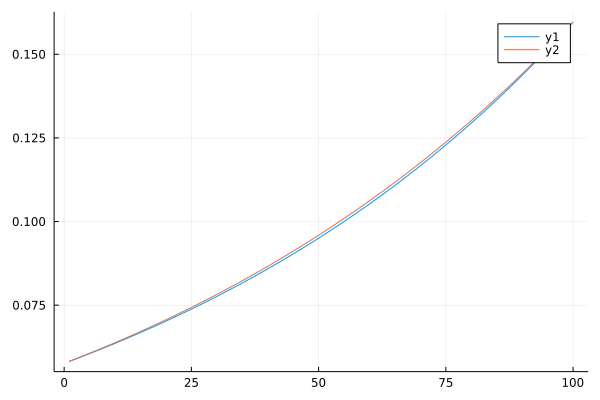

In [51]:
mu = lambda_uniform_mu(n,k);
x = rand(n);
y = rand(n);
T_max = 100;
values = zeros(T_max,2)
for l in 1:T_max
    values[l,1]= g(x*l/T_max + y*(T_max-l)/T_max);
    values[l,2] = g(x)^(l/T_max)*g(y)^((T_max-l)/T_max);
end

@show plot(values)


In [53]:
rhs = 0;
exponent = 0;
for i in 1:n
    exponent += k*mu_1[v]*(x[i]-1)
end
rhs = exp(exponent);


LoadError: UndefVarError: v not defined

In [5]:
# this is false because of convexity!!

for iter in 1:5
    # 
    mu = lambda_uniform_mu(n,k);
    x = rand(n);
    
    # LHS 
    lhs = 0
    mu_1 = get_marginals_mu(mu);
    for v in 1:n
        # compute marginals mu conditioned on v
        mu_v_1 = zeros(n);
        for s in 1:2^n
            if (count_ones(s) == k) && (s÷(2^(v-1))%2==1)
                for i in 1:n
                    if s÷(2^(i-1))%2==1
                        mu_v_1[i] += mu[s]/mu_1[v]/(k-1)/k;
                    end
                end
            end
        end
        exponent = x[v]-1;
        for i in 1:n
            if i!=v
                exponent += mu_v_1[i]*(k-1)*(x[i]-1);
            end
        end
        lhs += mu_1[v]*exp(exponent);        
    end
    
    # RHS
    rhs = 0;
    exponent = 0;
    for i in 1:n
        exponent += k*mu_1[i]*(x[i]-1)
    end
    rhs = exp(exponent);
    @show rhs-lhs;
end


rhs - lhs = -0.000923473837151495
rhs - lhs = -0.0005906265149909495
rhs - lhs = -0.0011994298707800055
rhs - lhs = -0.0001249895196316353
rhs - lhs = -0.0006567970495564707


In [6]:
# check if this is true

for iter in 1:5
    # 
    mu = lambda_uniform_mu(n,k);
    x = rand(n);
    
    # LHS 
    lhs = 0
    mu_1 = get_marginals_mu(mu);
    for v in 1:n
        # compute marginals mu conditioned on v
        mu_v_1 = zeros(n);
        for s in 1:2^n
            if (count_ones(s) == k) && (s÷(2^(v-1))%2==1)
                for i in 1:n
                    if s÷(2^(i-1))%2==1
                        mu_v_1[i] += mu[s]/mu_1[v]/(k-1)/k;
                    end
                end
            end
        end
        exponent = 0;
        for i in 1:n
            if i!=v
                exponent += mu_v_1[i]*(k-1)*(x[i]-1);
            end
        end
        lhs += mu_1[v]*x[v]*exp(exponent);        
    end
    
    # RHS
    rhs = 0;
    exponent = 0;
    for i in 1:n
        exponent += k*mu_1[i]*(x[i]-1)
    end
    rhs = exp(exponent);
    @show rhs-lhs;
end



rhs - lhs = 0.035259373992096554
rhs - lhs = 0.026197471964995098
rhs - lhs = 0.02914699595708698
rhs - lhs = 0.03443837943945793
rhs - lhs = 0.039251008592146086


The one right above is true but is it concave????

We can try some random values

In [7]:
function lhs_maybe_concave(x)
    to_return = 0;
    mu_1 = get_marginals_mu(mu);
    for v in 1:n
        # compute marginals mu conditioned on v
        mu_v_1 = zeros(n);
        for s in 1:2^n
            if (count_ones(s) == k) && (s÷(2^(v-1))%2==1)
                for i in 1:n
                    if s÷(2^(i-1))%2==1
                        mu_v_1[i] += mu[s]/mu_1[v]/(k-1)/k;
                    end
                end
            end
        end
        exponent = 0;
        for i in 1:n
            if i!=v
                exponent += mu_v_1[i]*(k-1)*(x[i]-1);
            end
        end
        to_return += mu_1[v]*x[v]*exp(exponent);
    end
    return to_return;
end;

plot(values) = Plot{Plots.GRBackend() n=2}


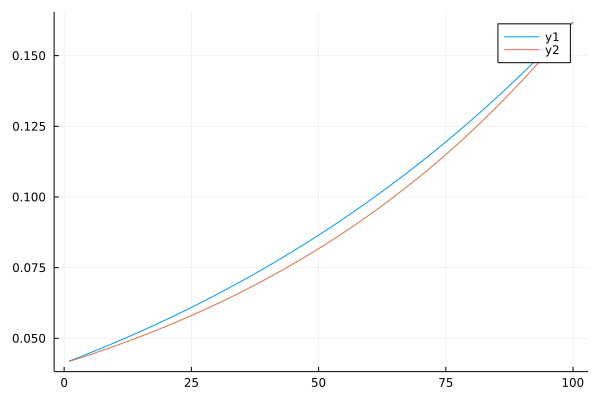

In [471]:
n=8;
k=4;
mu = k_dpp_mu(n,k);
x = rand(n);
y = rand(n);
T_max = 100;
values = zeros(T_max,2)
for l in 1:T_max
    values[l,1]= lhs_maybe_concave(x*l/T_max + y*(T_max-l)/T_max);
    values[l,2] = lhs_maybe_concave(x)^(l/T_max)*lhs_maybe_concave(y)^((T_max-l)/T_max);
end

@show plot(values)



In [493]:
N_iter = 1000;
T_max = 20;
tol = 1e-8;

n = 8;
k = 4;


iter = 0;
conj = true;
while iter < N_iter && conj
    mu = k_dpp_mu(n,k);
    x = rand(n);
    y = rand(n);
    values = zeros(T_max,2)
    for l in 1:T_max
        term1 = lhs_maybe_concave(x*l/T_max + y*(T_max-l)/T_max);
        term2 = lhs_maybe_concave(x)^(l/T_max)*lhs_maybe_concave(y)^((T_max-l)/T_max);
        if  term1 < term2-tol
            conj = false;
        end
    end
    iter += 1;
end
@show conj
@show iter

conj = true
iter = 1000


1000

plot(values) = Plot{Plots.GRBackend() n=2}


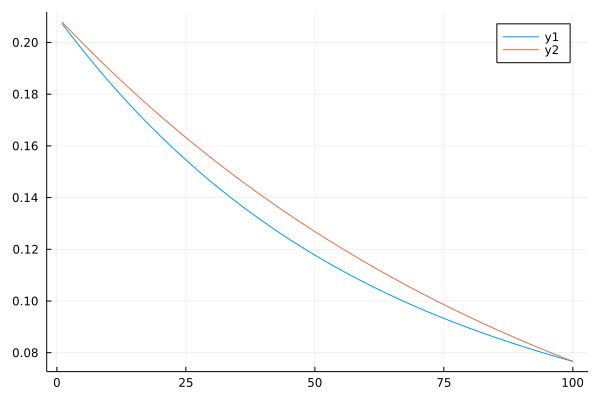

In [492]:
T_max = 100;
values = zeros(T_max,2)
for l in 1:T_max
    values[l,1]= lhs_maybe_concave(x*l/T_max + y*(T_max-l)/T_max);
    values[l,2] = lhs_maybe_concave(x)^(l/T_max)*lhs_maybe_concave(y)^((T_max-l)/T_max);
end

@show plot(values)



In [483]:
tol

1.0e-5

Check matrix log-concavity.

In [80]:
function mat_lhs_maybe_concave(x)
    to_return = zeros(d,d);
    mu_1 = get_marginals_mu(mu);
    for v in 1:n
        # compute marginals mu conditioned on v
        mu_v_1 = zeros(n);
        for s in 1:2^n
            if (count_ones(s) == k) && (s÷(2^(v-1))%2==1)
                for i in 1:n
                    if s÷(2^(i-1))%2==1
                        mu_v_1[i] += mu[s]/mu_1[v]/(k-1)/k;
                    end
                end
            end
        end
        exponent = log(x[v]);
        for i in 1:n
            if i!=v
                exponent += mu_v_1[i]*(k-1)*(x[i]-I);
            end
        end
        to_return += mu_1[v]*exp(exponent);
    end
    return to_return;
end;

plot(values) = Plot{Plots.GRBackend() n=2}


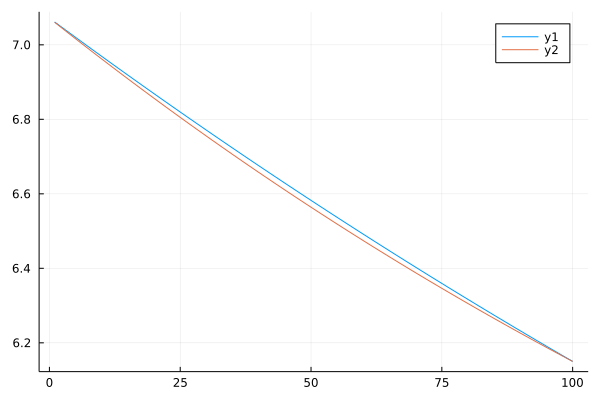

In [191]:
n = 8;
k = 2;
d = 4;
mu = k_dpp_mu(n,k);
x = create_y(n,d);
y = create_y(n,d);
for i in 1:n
    x[i] += I;
    y[i] += I;
end
T_max = 100;
values = zeros(T_max,2);
for l in 1:T_max
    values[l,1] = tr( mat_lhs_maybe_concave(x*l/T_max + y*(T_max-l)/T_max) );
    values[l,2] = tr( exp(l/T_max*log(mat_lhs_maybe_concave(x))+(T_max-l)/T_max*log(mat_lhs_maybe_concave(y))) );
end

@show plot(values)

The the function is log-concave in some sense.

In [254]:
# test this for a lot of random points

N_iter = 100;
T_max = 20;
tol = 1e-8;

n = 8;
k = 4;
d = 2;

iter = 0;
conj = true;
while iter < N_iter && conj
    mu = dpp_mu(n,k);
    x = create_y(n,d);
    y = create_y(n,d);
    values = zeros(T_max,2)
    for l in 1:T_max
        term1 = mat_lhs_maybe_concave(x*l/T_max + y*(T_max-l)/T_max);
        term2 = exp(l/T_max*log(mat_lhs_maybe_concave(x))+(T_max-l)/T_max*log(mat_lhs_maybe_concave(y))) ;
        if  isposdef( -term1 + term2 + I*tol)
            conj = false;
        end
    end
    iter += 1;
end
@show conj
@show iter

conj = false
iter = 1


1

The matrix inequality is false but the trace inequality is true.

In [66]:
z = x*l/T_max + y*(T_max-l)/T_max;
z[3]

4×4 Matrix{Float64}:
 0.233858  0.169278  0.139046  0.152374
 0.169278  0.196655  0.17401   0.12596
 0.139046  0.17401   0.188786  0.114017
 0.152374  0.12596   0.114017  0.113397

In [283]:
# test this for a lot of random points

N_iter = 1000;
T_max = 20;
tol = 1e-8;

n = 6;
k = 3;
d = 2;

iter = 0;
conj = true;
while iter < N_iter && conj
    mu = k_dpp_mu(n,k);
    x = create_y(n,d);
    y = create_y(n,d);
    values = zeros(T_max,2)
    for l in 1:T_max
        term1 = mat_lhs_maybe_concave(x*l/T_max + y*(T_max-l)/T_max);
        term2 = exp(l/T_max*log(mat_lhs_maybe_concave(x))+(T_max-l)/T_max*log(mat_lhs_maybe_concave(y))) ;
        if  tr(term1) < real(tr(term2))-tol
            conj = false;
        end
    end
    iter += 1;
end
@show conj
@show iter

conj = true
iter = 1000


1000

In [269]:
a = 3+4*im

3 + 4im

In [270]:
real(a)

3

Define the fuction $h_\ell$ as
$$
h_\ell(\mathbb{z}) = \sum_{T\in \binom{[n]}{\ell}} \mu^{(\ell)}(T) \prod_{i\in T} z_i \left(\sum_j \mu_{T}^{(1)}(j) z_j \right)^{k-\ell}
$$

We know **experimentally** that $h_\ell$ is log-convex.
Is $h_\ell$ monotone w.r.t. $\ell$?

In [5]:
function h(z,l,k,n,mu)
    to_return = 0;
    # compute mu^(l)
    mu_l = zeros(2^n);
    for s in 1:2^n
        if (count_ones(s) == k)
            for t in 1:2^n
                if (count_ones(t)==l) && (count_ones(t&s)==l)
                    mu_l[t] += mu[s]/binomial(k,l);
                end
            end
        end
    end
    for t in 1:2^n
        # compute marginals of mu conditioned on T 
        mu_t_1 = zeros(n);
        for s in 1:2^n
            if (count_ones(s) == k) && (count_ones(t&s)==l)
                for i in 1:n
                    if s÷(2^(i-1))%2==1
                        mu_t_1[i] += mu[s]/mu_l[t]/binomial(k,l)/k;
                    end
                end
            end
        end
        exponent = 0;
        for i in 1:n
            if t÷(2^(i-1))%2!=1
                exponent += mu_t_1[i]*(k-1)*(z[i]-1);
            end
        end
        coeff = exp(exponent);
        for i in 1:n
            if t÷(2^(i-1))%2==1
                coeff *= z[i];
            end
        end    
        to_return += mu_l[t]*coeff;
    end
    return to_return;
end;

In [6]:
a = 10;
b = 8;
a&b

8

In [ ]:
n = 12;
k = 9;

mu = lambda_uniform_mu(n,k);
x = rand(n);

values = zeros(k);
for i in 1:k
    values[i] = h(x,i,k,n,mu);
end
plot(values)    

The function seems to be monotone!!

In [ ]:
h(x,l-1,k,n,mu)

Test:

$$ tr\left( e^{k \sum_S \mu(S) \log(\frac{1}{k}\sum_{i\in S} e^{Y_i}) }\right) $$

In [ ]:
n = 5;
k = 3;
d = 2;

mu = lambda_uniform_mu(n,k);
y = create_y(n,d);


exponent = zeros(d,d);
for s in 1:2^n
    if mu[s]>0
        sum_i = zeros(d,d);
        for i in 1:n
            if s÷(2^(i-1))%2==1
                sum_i += exp(y[i])/k;
            end
        end
        #println(s)
        #println(mu[s])
        #println(sum_i)
        exponent += k*mu[s]*log(sum_i);
    end
end
lhs = tr(exp(exponent));

mu_1 = get_marginals_mu(mu);

sum_i = zeros(d,d);
for i in 1:n
    sum_i += mu_1[i]*exp(y[i]);
end
rhs = tr(exp(k*log(sum_i)))


mgf = 0;
for s in 1:2^n
    if mu[s]>0
        y_s = zeros(d,d);
        for i in 1:n
            if s÷(2^(i-1))%2==1
                y_s += y[i];
            end
        end
        mgf += tr(mu[s]*exp(y_s));
    end
end

@show rhs-lhs
@show lhs-mgf

In [ ]:
# iterate check

n = 8;
k = 4;
d = 2;


N_iter = 1000;
iter = 0;
conj = true;
while iter<N_iter && conj
    mu = k_dpp_mu(n,k);
    y = create_y(n,d);


    exponent = zeros(d,d);
    for s in 1:2^n
        if mu[s]>0
            sum_i = zeros(d,d);
            for i in 1:n
                if s÷(2^(i-1))%2==1
                    sum_i += exp(y[i])/k;
                end
            end
            #println(s)
            #println(mu[s])
            #println(sum_i)
            exponent += k*mu[s]*log(sum_i);
        end
    end
    lhs = tr(exp(exponent));

    mu_1 = get_marginals_mu(mu);

    sum_i = zeros(d,d);
    for i in 1:n
        sum_i += mu_1[i]*exp(y[i]);
    end
    rhs = tr(exp(k*log(sum_i)));
    
    mgf = 0;
    for s in 1:2^n
        if mu[s]>0
            y_s = zeros(d,d);
            for i in 1:n
                if s÷(2^(i-1))%2==1
                    y_s += y[i];
                end
            end
            mgf += tr(mu[s]*exp(y_s));
        end
    end
    
    conj = rhs>=lhs && lhs>= mgf;
    iter += 1;
end

@show conj 
@show iter

Can I modify it a little bit so that it stays true?

In [ ]:
# iterate check

n = 8;
k = 4;
d = 4;


N_iter = 1000;
iter = 0;
conj = true;
while iter<N_iter && conj
    mu = k_dpp_mu(n,k);
    y = create_y(n,d);


    exponent = zeros(d,d);
    for s in 1:2^n
        if mu[s]>0
            sum_i = zeros(d,d);
            for i in 1:n
                if s÷(2^(i-1))%2==1
                    sum_i += exp(y[i])/k;
                end
            end
            #println(s)
            #println(mu[s])
            #println(sum_i)
            exponent += k*mu[s]*log(sum_i);
        end
    end
    lhs = tr(exp(exponent));

    mu_1 = get_marginals_mu(mu);

    sum_i = zeros(d,d);
    for i in 1:n
        sum_i += mu_1[i]*exp(y[i]);
    end
    rhs = tr(exp(k*log(sum_i)));
    
    mgf = 0;
    for s in 1:2^n
        if mu[s]>0
            y_s = zeros(d,d);
            for i in 1:n
                if s÷(2^(i-1))%2==1
                    y_s += y[i];
                end
            end
            mgf += tr(mu[s]*exp(y_s));
        end
    end
    
    conj = rhs>=lhs && lhs>= mgf;
    iter += 1;
end

@show conj 
@show iter

Let $f$ be a matrix valued function. We want to test if it is "matrix log-concave" by looking if
- $$ tr(f(\lambda x+ (1-\lambda)y)) \geq tr( e^{\lambda \log(f(x)) + (1-\lambda)\log(f(y))})$$
- $$ tr(f(\lambda x+ (1-\lambda)y)^{1/\lambda}) \geq tr( e^{\log(f(x)) + (1-\lambda)/\lambda\log(f(y))})$$

plot(merge) = Plot{Plots.GRBackend() n=2}


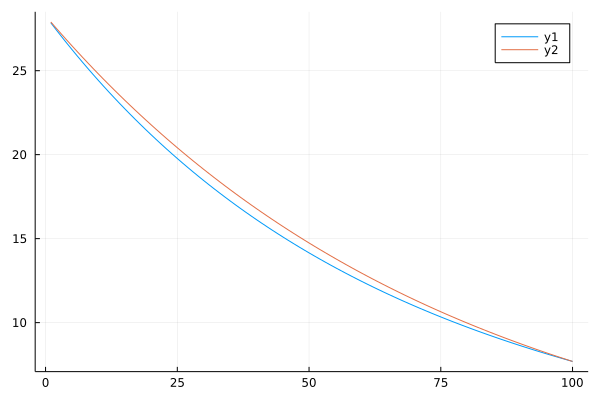

In [23]:
n = 10;
k = 6;

T_max = 100;

function mgf(mu,y)
    mgf = zeros(d,d);
    for s in 1:2^n
        if mu[s]>0
            y_s = zeros(d,d);
            for i in 1:n
                if s÷(2^(i-1))%2==1
                    y_s += y[i];
                end
            end
            mgf += mu[s]*exp(y_s);
        end
    end
    return mgf;
end


mu = lambda_uniform_mu(n,k);
x = create_y(n,d);
y = create_y(n,d);

merge = zeros(T_max,2);
for t in 1:T_max
    merge[t,1] = tr(mgf(mu,t/T_max*x+(T_max-t)/T_max*y));
    merge[t,2] = tr(exp(t/T_max*log(mgf(mu,x))+(T_max-t)/T_max*log(mgf(mu,y))));
end

@show plot(merge)


plot(merge) = Plot{Plots.GRBackend() n=2}


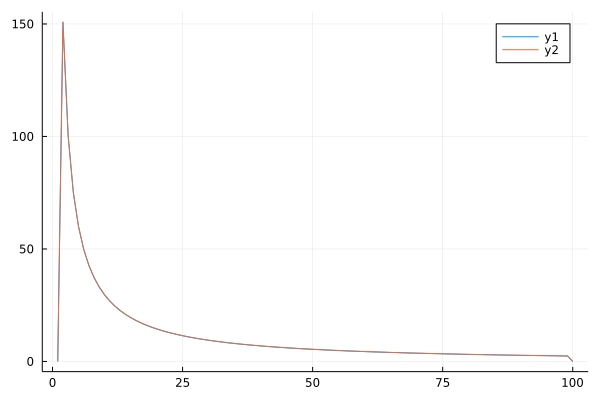

In [36]:
n = 10;
k = 6;

T_max = 100;

function mgf(mu,y)
    mgf = zeros(d,d);
    for s in 1:2^n
        if mu[s]>0
            y_s = zeros(d,d);
            for i in 1:n
                if s÷(2^(i-1))%2==1
                    y_s += y[i];
                end
            end
            mgf += mu[s]*exp(y_s);
        end
    end
    return mgf;
end


mu = lambda_uniform_mu(n,k);
x = create_y(n,d);
y = create_y(n,d);

merge = zeros(T_max,2);
for t in 2:T_max-1
    merge[t,1] = log(tr(mgf(mu,t/T_max*x+(T_max-t)/T_max*y)^(T_max/t)));
    merge[t,2] = log(tr(exp(log(mgf(mu,x))+(T_max-t)/t*log(mgf(mu,y)))));
end

@show plot(merge)

In [29]:
@show merge[6,1]
@show merge[6,2]

merge[6, 1] = 236.36997069389565
merge[6, 2] = 259.80691190657734


259.80691190657734

In [57]:
N_iter = 1000;

conj = true
n = 8;
k = 4;
d = 1;

T_max = 100;

function mgf(mu,y)
    mgf = zeros(d,d);
    for s in 1:2^n
        if mu[s]>0
            y_s = zeros(d,d);
            for i in 1:n
                if s÷(2^(i-1))%2==1
                    y_s += y[i];
                end
            end
            mgf += mu[s]*exp(y_s);
        end
    end
    return mgf;
end

iter = 0;
while conj && iter < N_iter

    mu = k_dpp_mu(n,k);
    x = create_y(n,d);
    y = create_y(n,d);

    for t in 2:T_max-1
        lhs = tr(mgf(mu,t/T_max*x+(T_max-t)/T_max*y)^(T_max/t));
        rhs = tr(exp(log(mgf(mu,x))+(T_max-t)/t*log(mgf(mu,y))));
        if lhs>rhs
            conj = false;
        end
    end
    iter += 1;
end

@show conj


conj = true


true

In [58]:
iter

1000

Check:

$$ \log(\sum_S \mu(S) e^{\sum_{i\in S} Y_i}) \preceq k\log(\sum_S \mu(S) e^{\sum_{i\in S} Y_i/k}) $$

In [13]:
N_iter = 5;

conj = true
n = 5;
k = 4;
d = 1;


function mgf(mu,y)
    mgf = zeros(d,d);
    for s in 1:2^n
        if mu[s]>0
            y_s = zeros(d,d);
            for i in 1:n
                if s÷(2^(i-1))%2==1
                    y_s += y[i];
                end
            end
            mgf += mu[s]*exp(y_s);
        end
    end
    return mgf;
end

iter = 0;
while conj && iter < N_iter

    mu = power_k_dpp_mu(n,k);
    y = create_y(n,d);

    lhs = mgf(mu,y);
    rhs = mgf(mu,y/k)^k;
    print(lhs);
    print("   ");
    println(rhs);
    if maximum(eigvals(rhs-lhs))>0
        conj = false;
    end
    iter += 1;
end

@show conj
@show iter


LoadError: MethodError: no method matching power_k_dpp_mu(::Int64, ::Int64)
[0mClosest candidates are:
[0m  power_k_dpp_mu(::Int64, ::Int64, [91m::Any[39m) at In[12]:1

plot(merge) = Plot{Plots.GRBackend() n=2}


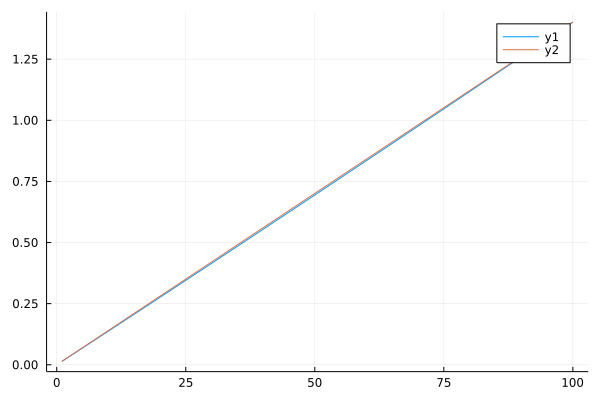

In [148]:
merge = zeros(100,2);

n = 6;
k = 5;
d = 1;
mu = lambda_uniform_mu(n,k);
y = create_y(n,d);

for i in 1:100
    merge[i,1] = tr(log(mgf(mu,y*i/100)));
    merge[i,2] = i/100*tr(log(mgf(mu,y)));
end
@show plot(merge)

In [133]:
y/2

5-element Vector{Matrix{Float64}}:
 [0.29910775316584337]
 [0.003944325670677789]
 [0.5]
 [0.029988646952441977]
 [0.08495473933904908]

In [469]:
n = 6;
k = 5;
d = 4;
mu = lambda_uniform_mu(n,k);
y = create_y(n,d);


lhs = zeros(d,d);
rhs = zeros(d,d)
for s in 1:2^n
    y_s_lhs = zeros(d,d);
    y_s_rhs = zeros(d,d);
    for i in 1:n
        if (s÷(2^(i-1)))%2==1
            y_s_rhs += log(exp(y[i])/k+I*(k-1)/k);
            y_s_lhs += y[i];
        end
    end
    rhs += mu[s]*exp(y_s_rhs)
    lhs += mu[s]*exp(y_s_lhs)
end

rhs = log(rhs);
lhs = k*log(rhs);

@show eigvals(rhs-lhs)

eigvals(rhs - lhs) = ComplexF64[0.7460224312554629 + 0.0im, 12.765521187136851 + 0.0im, 13.503828628920695 + 0.0im, 15.985603180486113 + 0.0im]


4-element Vector{ComplexF64}:
 0.7460224312554629 + 0.0im
 12.765521187136851 + 0.0im
 13.503828628920695 + 0.0im
 15.985603180486113 + 0.0im

In [471]:
n = 6;
k = 5;
d = 4;


conj = true
while conj
    mu = lambda_uniform_mu(n,k);
    y = create_y(n,d);
    lhs = zeros(d,d);
    rhs = zeros(d,d)
    for s in 1:2^n
        y_s_lhs = zeros(d,d);
        y_s_rhs = zeros(d,d);
        for i in 1:n
            if (s÷(2^(i-1)))%2==1
                y_s_rhs += log(exp(y[i])/k+I*(k-1)/k);
                y_s_lhs += y[i];
            end
        end
        rhs += mu[s]*exp(y_s_rhs)
        lhs += mu[s]*exp(y_s_lhs)
    end

    rhs = log(rhs);
    lhs = k*log(rhs);
    if real(eigvals(rhs-lhs)[1]) <0
        conj = false
    end
end


@show eigvals(rhs-lhs)

eigvals(rhs - lhs) = ComplexF64[-0.045643106878062834 + 0.0im, 11.256622984013232 + 0.0im, 12.130786456292464 + 0.0im, 14.09364699445096 + 0.0im]


4-element Vector{ComplexF64}:
 -0.045643106878062834 + 0.0im
    11.256622984013232 + 0.0im
    12.130786456292464 + 0.0im
     14.09364699445096 + 0.0im

In [12]:
function power_k_dpp_mu(
        n::Int64,
        k::Int64,
        p)
    A = rand(n,n);
    matrix =  A'*A;

    mu = zeros(2^n);
    tot = 0;
    for s in 1:2^n
        if count_ones(s) == k
            index = [];
            for i in 1:n
                if s÷(2^(i-1))%2==1
                    push!(index,i);
                end
            end
            mu[s] = det(matrix[index,index])^p;
            tot += mu[s];
        end
    end

    for s in 1: 2^n
        mu[s] = mu[s]/tot;
    end
    return mu;
end;

In [4]:
@show 0.1

0.1 = 0.1


0.1

In [5]:
a = 0.1

0.1

In [7]:
@show a

a = 0.1


0.1

Chek a different function.
We are in the scalar case and we wanto to show that $m1$ is log-concave. If I change $m1$ by susbtituting the weights with uniform wheights, the function does not remain log-concave. (It cannot be the case that the summands that appears in function have a common interlacer)


In [50]:
function random_marginals()
    mu_1 = rand(n);
    tot = sum(mu_1);
    return mu_1/tot;
end
    
    
function lhs_maybe_concave(x)
    to_return = 0;
    mu_1 = get_marginals_mu(mu);
    random_mu_1 = random_marginals();
    for v in 1:n
        # compute marginals mu conditioned on v
        mu_v_1 = zeros(n);
        for s in 1:2^n
            if (count_ones(s) == k) && (s÷(2^(v-1))%2==1)
                for i in 1:n
                    if s÷(2^(i-1))%2==1
                        mu_v_1[i] += mu[s]/mu_1[v]/(k-1)/k;
                    end
                end
            end
        end
        exponent = 0;
        for i in 1:n
            if i!=v
                exponent += mu_v_1[i]*(k-1)*(x[i]-1);
            end
        end
        to_return += x[v]*exp(exponent)/n;
    end
    return to_return;
end;

In [51]:
N_iter = 1000;
T_max = 10;
tol = 1e-8;

n = 8;
k = 4;


iter = 0;
conj = true;
while iter < N_iter && conj
    mu = power_k_dpp_mu(n,k, 0.8);
    x = rand(n);
    y = rand(n);
    values = zeros(T_max,2)
    for l in 1:T_max
        term1 = lhs_maybe_concave(x*l/T_max + y*(T_max-l)/T_max);
        term2 = lhs_maybe_concave(x)^(l/T_max)*lhs_maybe_concave(y)^((T_max-l)/T_max);
        if  term1 < term2-tol
            conj = false;
        end
    end
    iter += 1;
end
@show conj
@show iter

conj = true
iter = 1000


1000

In [39]:
random_marginals()

8-element Vector{Float64}:
 0.10880865724996755
 0.1101970813294599
 0.20240898293815995
 0.03839206750617174
 0.1939980876089485
 0.016204787327221123
 0.16068697203366003
 0.16930336400641102